# Problem Statement
---

The telecommunications industry operates in a highly competitive environment where customers have access to multiple service providers and can switch operators with minimal barriers. As a result, telecom companies experience an estimated annual customer churn rate of 15–25%, posing a significant challenge to revenue sustainability. In this competitive and dynamic landscape, customer
retention becomes a critical focus for businesses. The level of client
satisfaction is key to a company’s success, as it not only influences customer loyalty but also contributes to increasing the company’s market value.


Therefore, there is a pressing need for data-driven approaches that can accurately predict customer churn and uncover the key factors influencing customer attrition. This project aims to develop a predictive model to identify customers at high risk of churn and to analyze the primary indicators contributing to churn behavior, enabling telecom providers to implement targeted retention strategies.

# Dataset Attributes
---
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

# Import Libraries + Load Data
---
The data collection phase involves obtaining a dataset available on the Kaggle platform **Telecom Customer Churn dataset**. This dataset includes a variety of variables that represent customer profiles and behaviors, forming the basis for predicting the likelihood of
churn.

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [368]:
data = pd.read_csv('Telco_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA)
---
At this stage, the collected dataset undergoes a preprocessing phase to ensure its integrity and suitability for subsequent analysis. The initial step involves identifying and quantifying missing values and detecting duplicate entries.

Following this, appropriate techniques are employed to address missing data, such as imputation or exclusion, and necessary adjustments are made to standardize the data format, thereby enhancing its compatibility for analytical
procedures.

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [370]:
data.shape

(7043, 21)

- The raw data contains 7,043 rows (customers) and 21 columns (features).
- The "Churn" column is our target variable.
- Among the 21 features, 18 are of the object data type. The remaining three features are numeric, except for TotalCharges, which will be converted to numeric in preprocessing.

In [371]:
data.duplicated().any()

np.False_

A check for duplicate values was conducted, and the results showed that the dataset does not contain any duplicate values.

In [372]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [373]:
has_empty_spaces = data['TotalCharges'].apply(lambda x: isinstance(x, str) and x.strip() == "").any()

if has_empty_spaces:
    print(f'Yes, it has empty spaces counted as non-null.')
else:
    print(f'No, it doesnt have empty spaces counted as non-null.')

Yes, it has empty spaces counted as non-null.


In [374]:
l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',l2)

for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']

Index Positions with empty spaces :  [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


Next, a missing value check was performed. The data information revealed that none of the features had missing values. However, when checking for empty spaces, it was found that the TotalCharges feature contains empty spaces
counted as non-null at index positions 448, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, and 6754.

The missing data was filled by replacing the empty elements with the value from the previous position.

In [375]:
data.drop(columns = ['customerID'], inplace = True)

customerID was dropped to ensure that the model or analysis focuses on more relevant features that can provide better insights or predictions.

# Data Preprocessing
---
In this stage, the collected data undergoes pre-processing to ensure its suitability for analysis. Key steps include handling missing values and adjusting data formats. Additionally, categorical and numerical data are processed in a way that makes it ready for modeling.

1. Convert String Feature to Float

In [376]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

2. Label Encoding

In [377]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [378]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


In [379]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


# Data Visualization
---
Data visualization aims to understand the distribution and patterns within the dataset, which helps identify outliers or extreme values that may influence prediction outcomes. This stage is crucial for gaining preliminary insights into the relationships between variables that may be relevant to predicting churn.


1. Target Feature Visualization

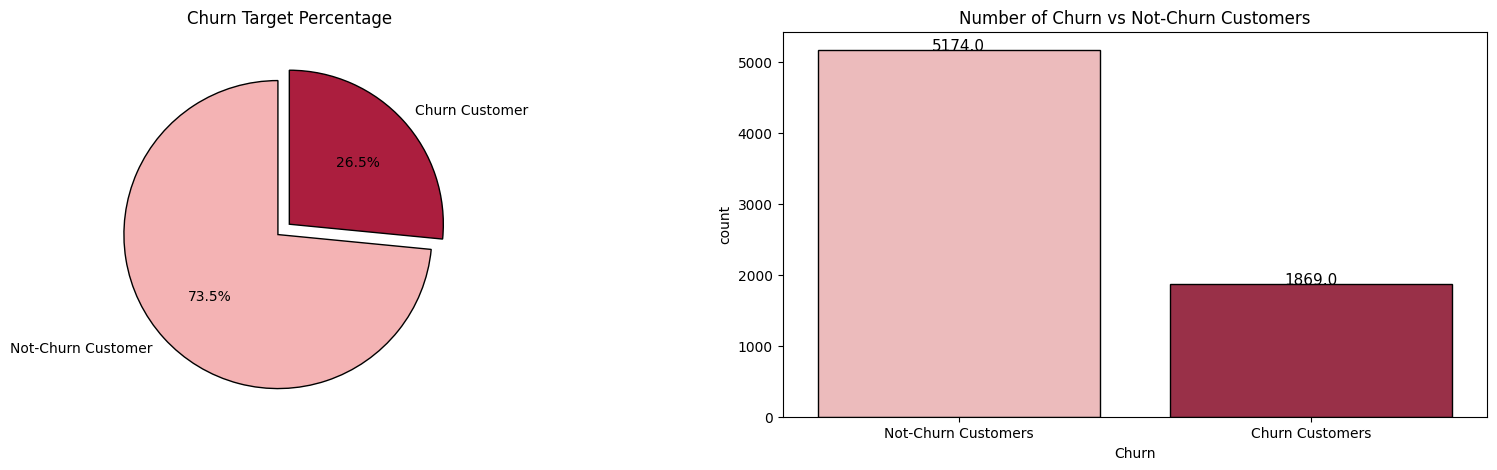

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare values
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Define colors
colors = ['#F4B3B4', '#ab1e3e']  # Not-Churn, Churn

# Plotting the figures
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart for Churn vs Not-Churn percentage
plt.subplot(1, 2, 1)
plt.pie(
    circle,
    labels=['Not-Churn Customer', 'Churn Customer'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0),
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Churn Target Percentage')

# Countplot for Churn vs Not-Churn counts
plt.subplot(1, 2, 2)
ax = sns.countplot(
    x='Churn',
    data=df1,
    palette=colors,
    edgecolor='black'
)

# Add count labels
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 2,
        rect.get_height(),
        ha='center',
        fontsize=11
    )

ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])
plt.title('Number of Churn vs Not-Churn Customers')

plt.show()

- Not-Churn value has 5174 rows and Churn value has 1869 rows.
- The dataset is unbalanced with a nearly 3:1 ratio, which will cause predictions to be biased towards Not-Churn customers.

2. Categorical Features vs Target Feature
---
To visualize categorical features, they are segmented into three groups based on their values or based on the column name because we have too many categorical features.

In [381]:
categorical_features.remove('Churn')

In [382]:
# Customer Information
l1 = ['gender','SeniorCitizen','Partner','Dependents']
# Services Signed Up for
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
# Payment Information
l3 = ['Contract','PaperlessBilling','PaymentMethod']

Group 1 is Customer Information, containing:
- gender
- SeniorCitizen
- Partner
- Dependents

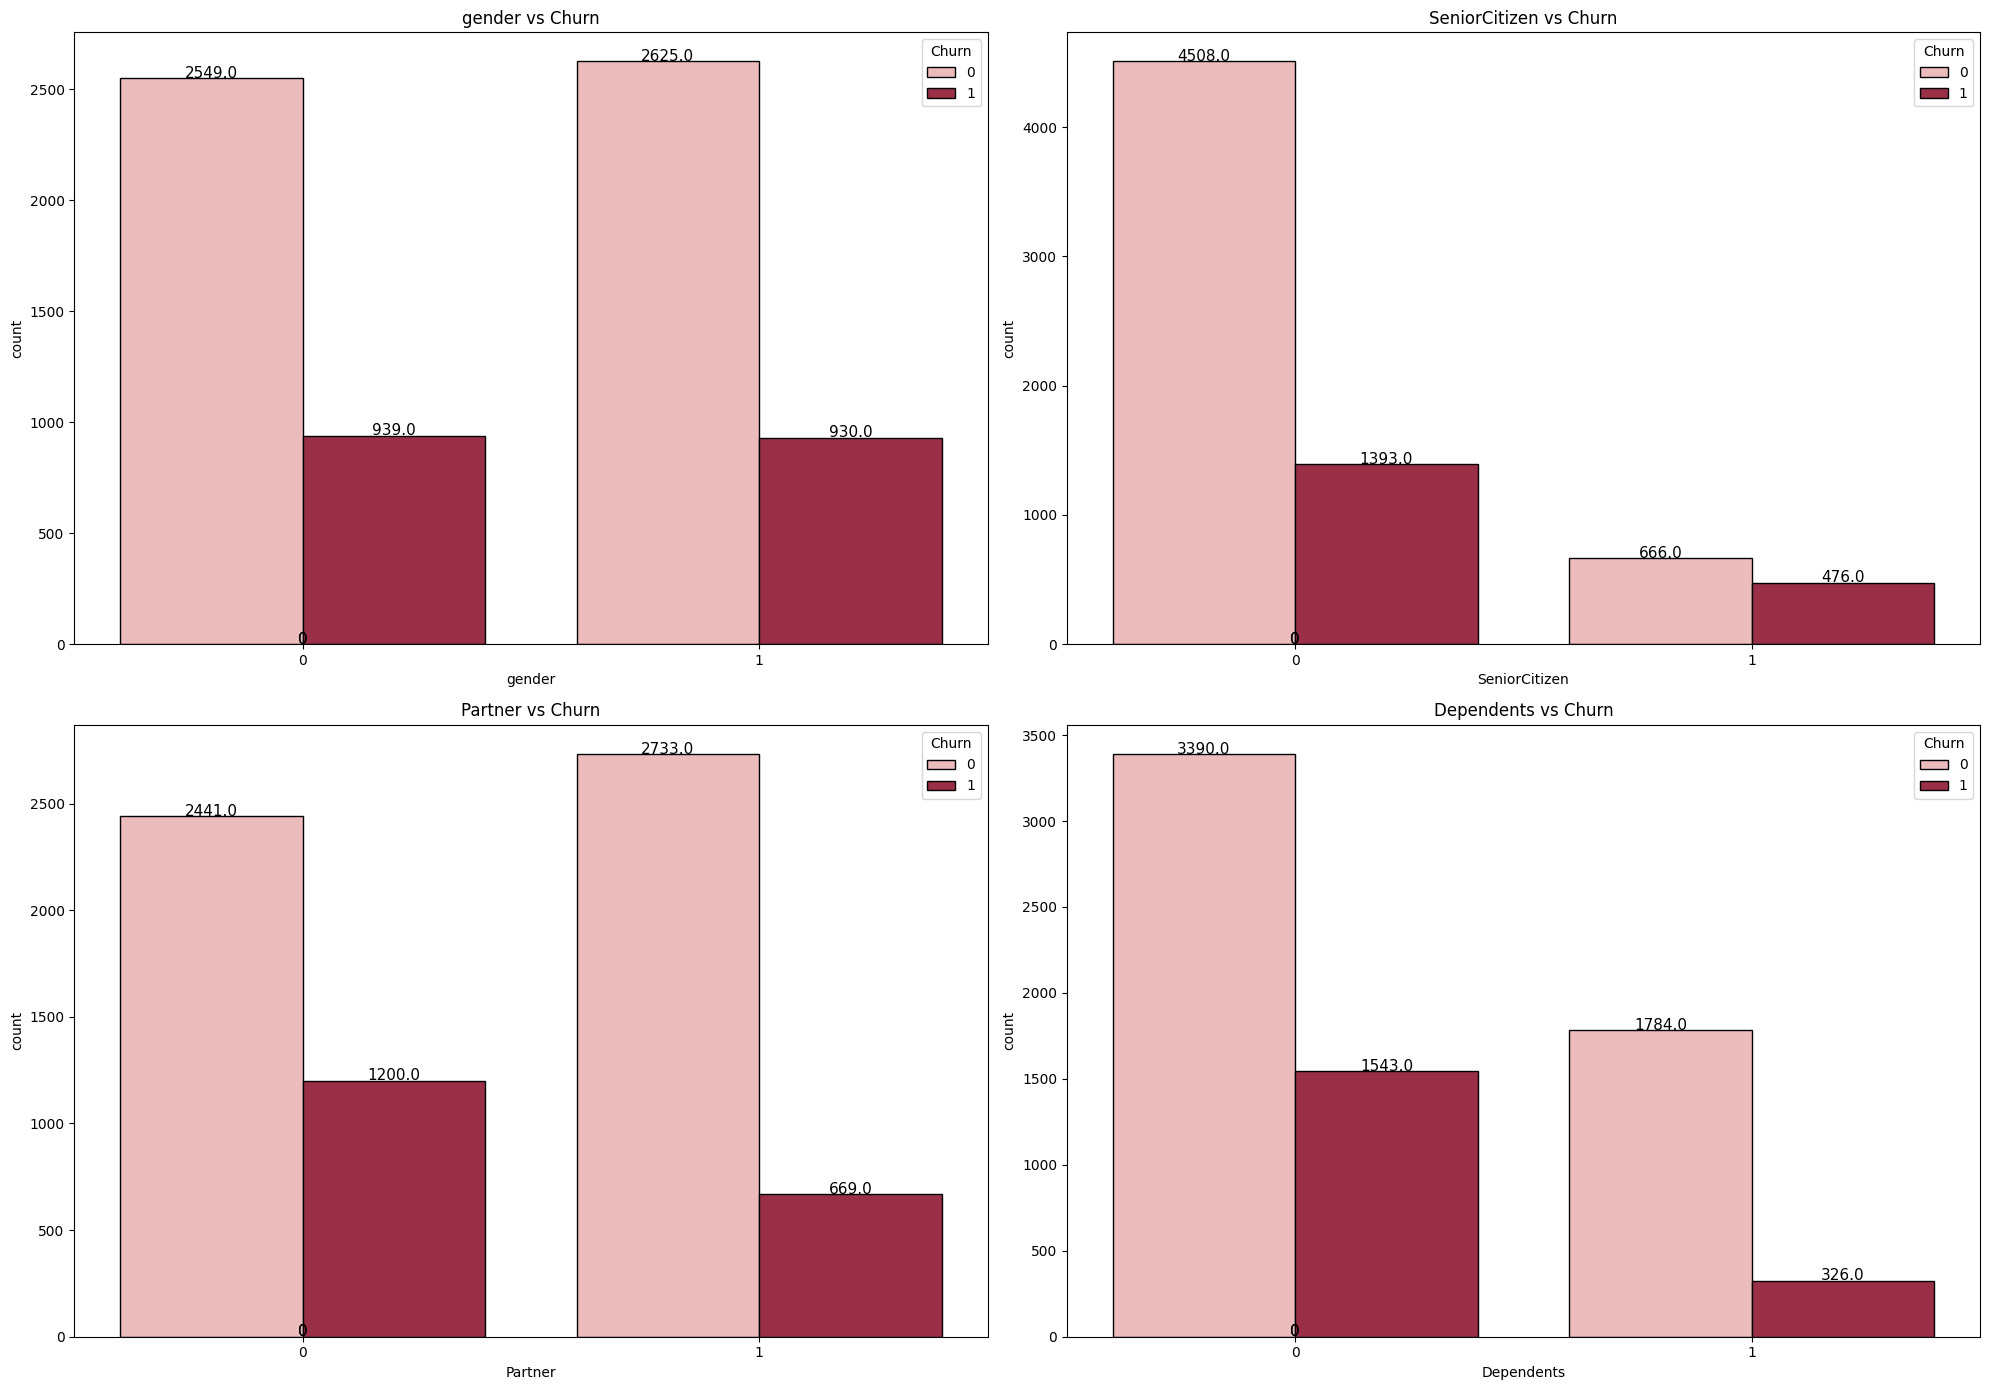

In [383]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i in range(len(l1)):
    plt.subplot(2, 2, i + 1)
    # Pass column name using 'x=' keyword argument
    ax = sns.countplot(x=l1[i], data=df1, hue="Churn", palette=colors, edgecolor='black')

    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

    title = f'{l1[i]} vs Churn'
    plt.title(title)

plt.tight_layout()
plt.show()

- Both male and female customers show a higher proportion of non-churn compared to churn, although the numbers are quite similar.
- Non-senior individuals are mostly using the service instead of senior citizens, with most not switching.
- For Partners, there are more non-churn customers than churn customers.
- Similarly, for customers with dependents, the proportion of non-churn customers is higher than that of churn customers.

In [384]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100, seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100] # No - Yes

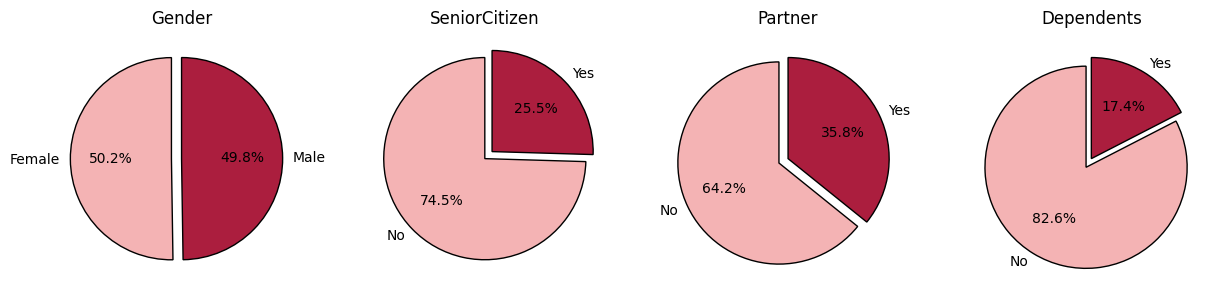

In [385]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- We can observe a clear cut 50% - 50% split between the male and female that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly.
- 75% of the churned customers are not SeniorCitizen. This is a major info that the company needs to divert it's attention towards.
- Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.

Group 2 is Services Subscribed by the Customer, containing:
- PhoneService
- MultipleLines
- InternetService
- StreamingTV
- StreamingMovies
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport

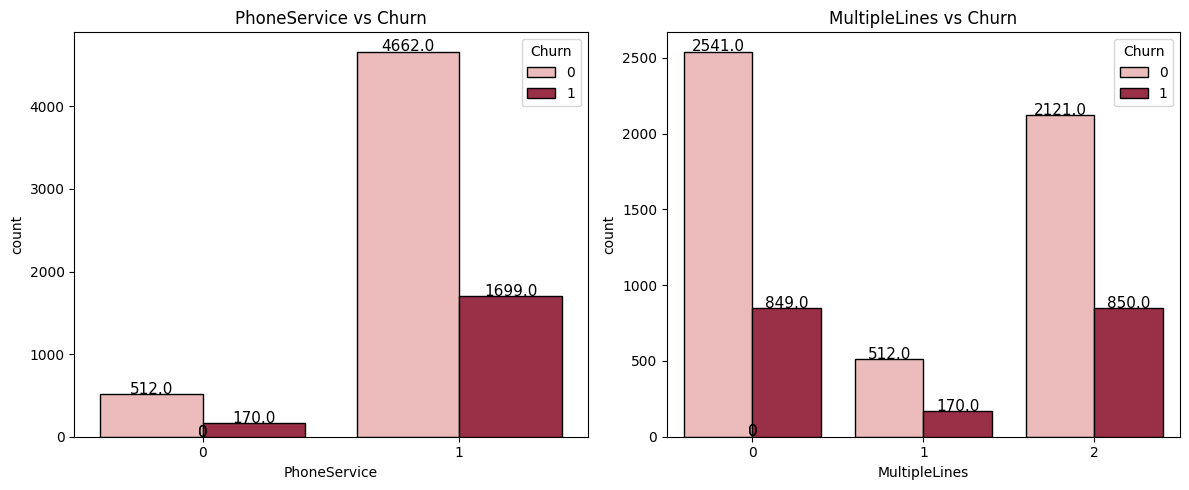

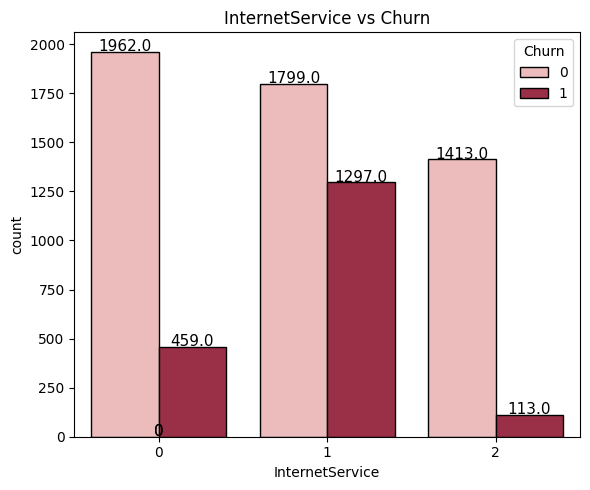

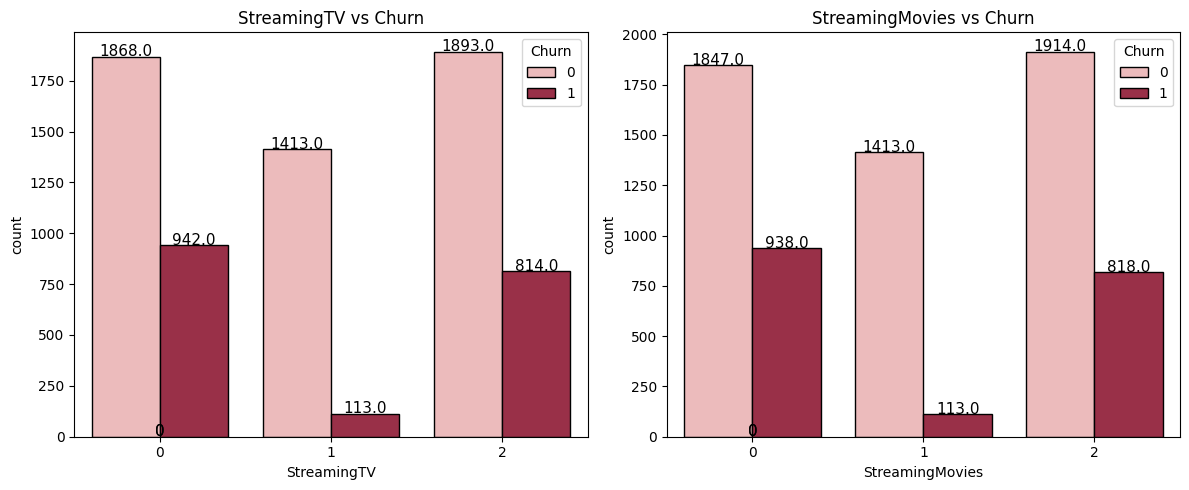

In [386]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First set of subplots for l2[0:2]
for i in range(2):
    plt.subplot(1, 2, i + 1)
    ax = sns.countplot(x=l2[i], data=df1, hue="Churn", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    title = f'{l2[i]} vs Churn'
    plt.title(title)

plt.tight_layout()
plt.show()

# Single plot for l2[2]
fig, ax = plt.subplots(figsize=(6, 5))

ax = sns.countplot(x=l2[2], data=df1, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
title = f'{l2[2]} vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()

# Second set of subplots for l2[3:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    ax = sns.countplot(x=l2[i + 3], data=df1, hue="Churn", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    title = f'{l2[i + 3]} vs Churn'
    plt.title(title)

plt.tight_layout()
plt.show()

- For both PhoneService and MultipleLines, the proportion of non-churn customers is higher than churn customers.
- StreamingTV and StreamingMovies, the proportion of non-churn customers is higher than churn customers.
- For InternetService, the Fiber Optic type has a relatively high proportion of customers who have churned.

In [387]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100, multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100, internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100, streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100, streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

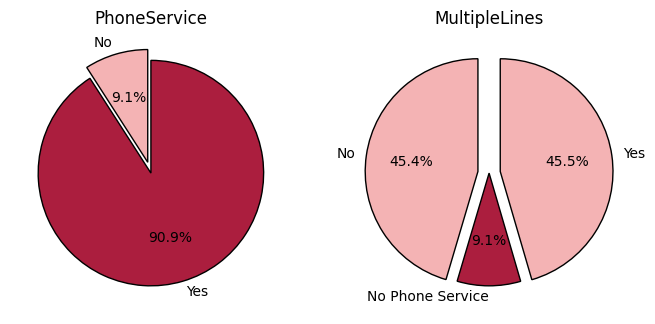

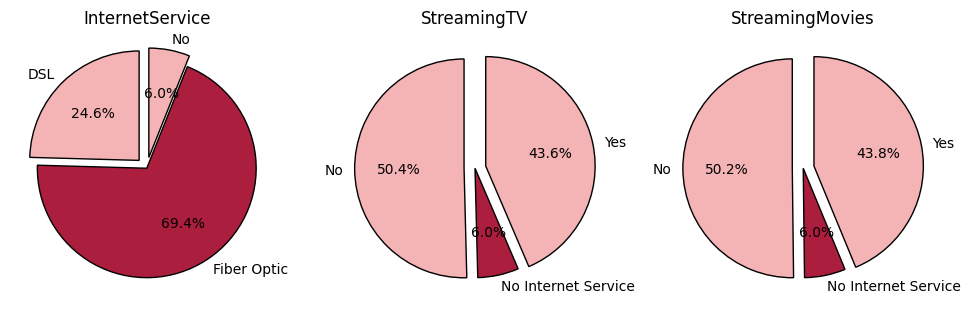

In [388]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

- Despite providing PhoneService, a high percentage of customers have switched.
- Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless.
- Customers definitely did not appreciate the approach of Fiber Optic for providing InternetService with 70% churned.
- For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

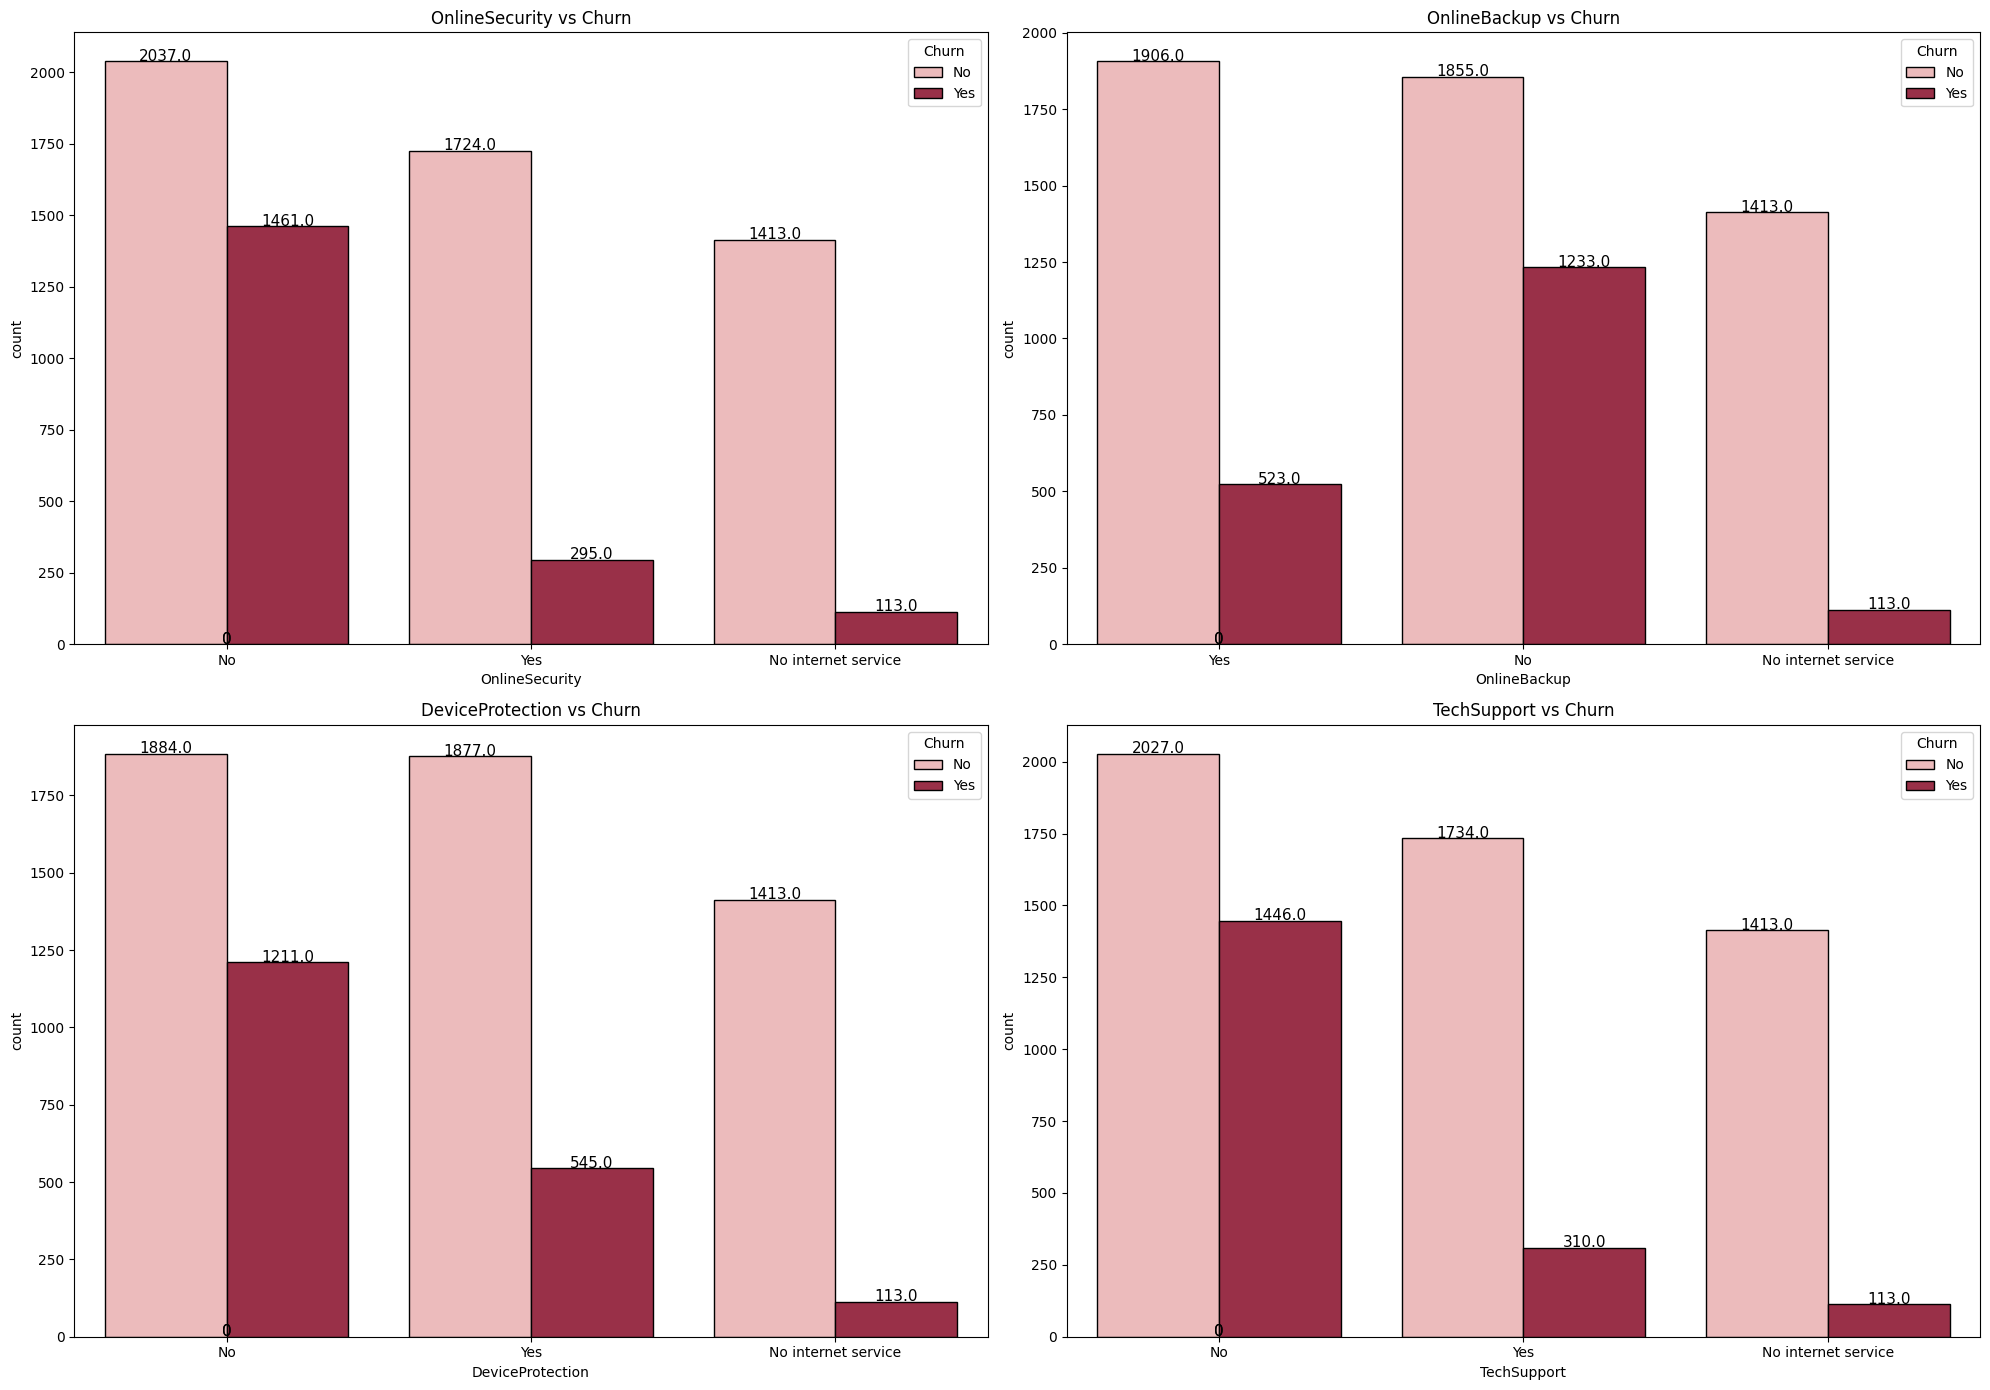

In [389]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# Iterate over the last 4 elements of l2
for i in range(len(l2[-4:])):
    plt.subplot(2, 2, i + 1)
    # Pass the column name using 'x='
    ax = sns.countplot(x=l2[-4 + i], data=data, hue="Churn", palette=colors, edgecolor='black')

    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

    title = f'{l2[-4 + i]} vs Churn'
    plt.title(title)

plt.tight_layout()
plt.show()

- DeviceProtection, TechSupport, OnlineSecurity, and OnlineBackup, all have a
higher proportion of non-churn customers compared to churn customers.
- On the other hand, a significant number of customers who do not have any of these four services tend to churn.

In [390]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes

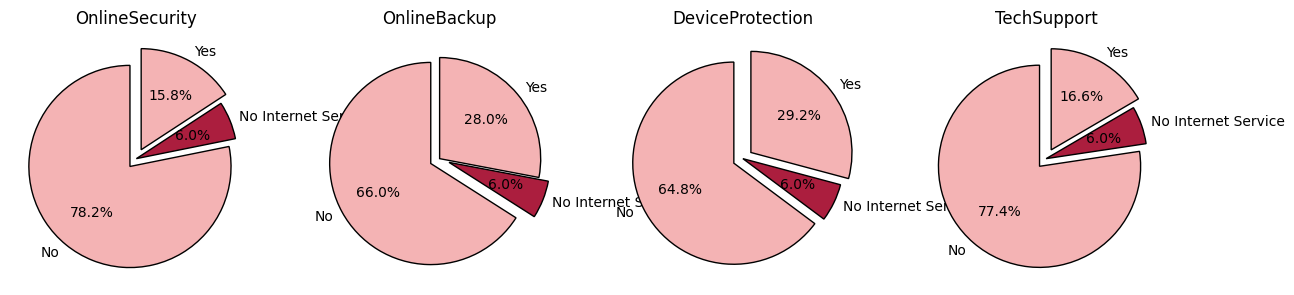

In [391]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

- Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features.

Group 3 is Payment Information, contains:
- Contract
- PaperlessBilling
- PaymentMethod

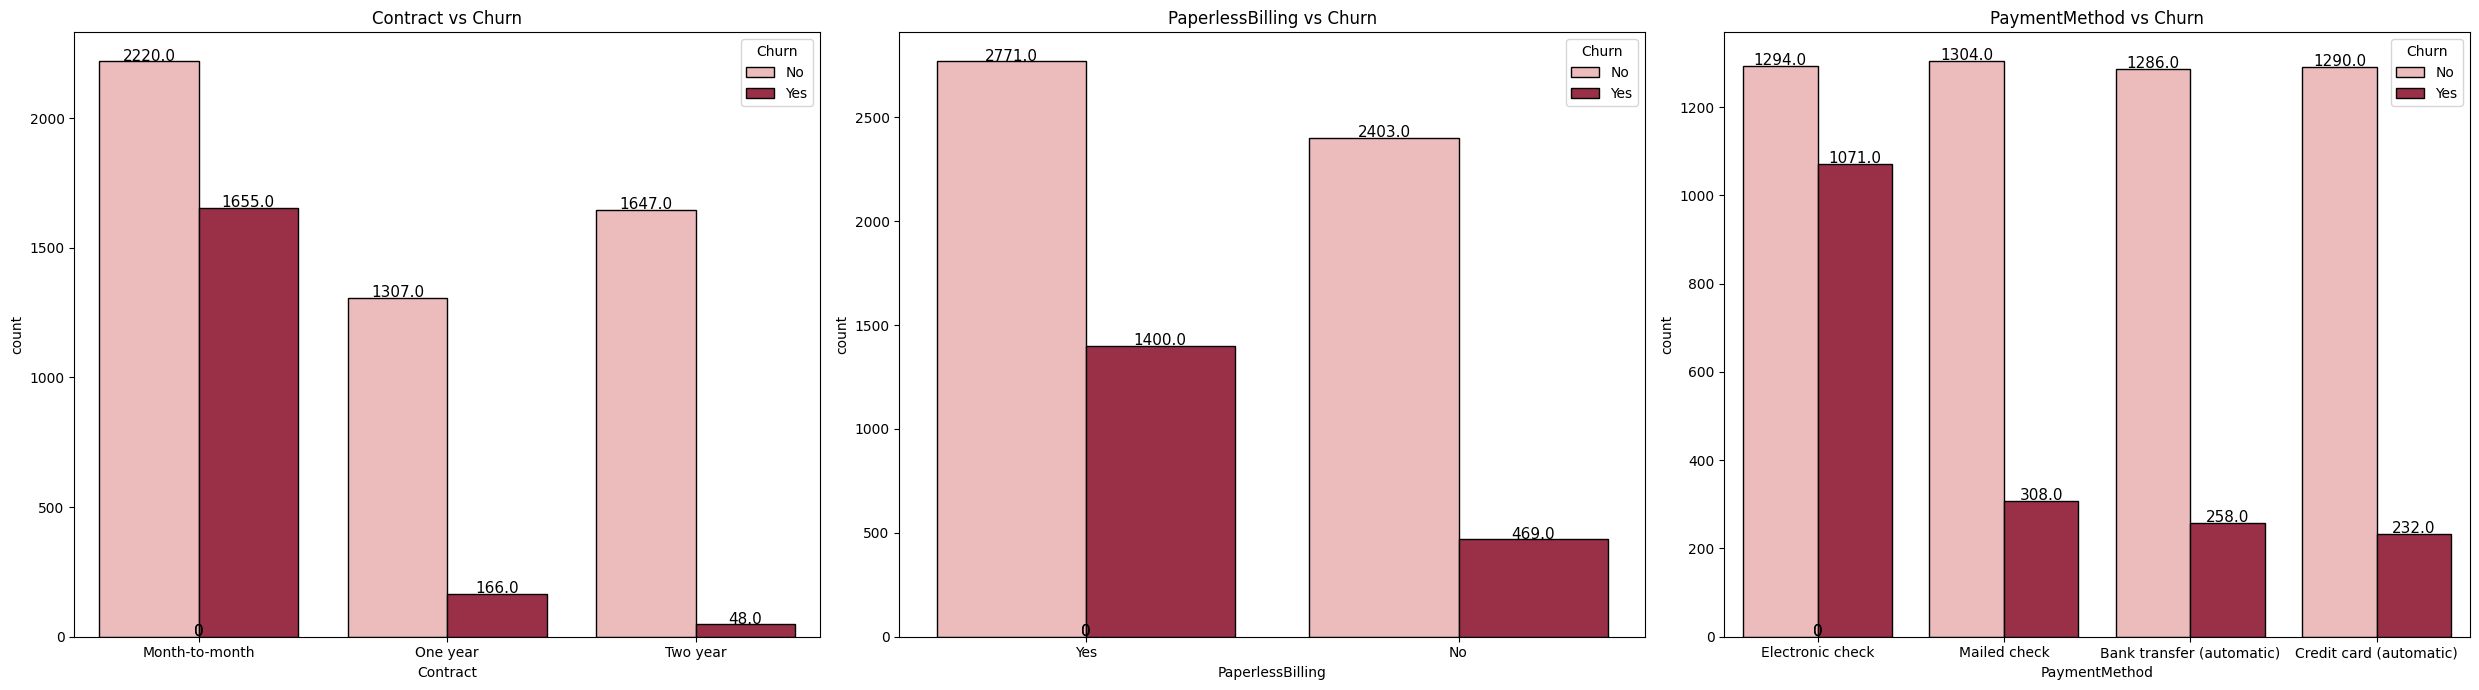

In [392]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# First plot for l3[0]
plt.subplot(1, 3, 1)
ax = sns.countplot(x=l3[0], data=data, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
title = f'{l3[0]} vs Churn'
plt.title(title)

# Second plot for l3[1]
plt.subplot(1, 3, 2)
ax = sns.countplot(x=l3[1], data=data, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
title = f'{l3[1]} vs Churn'
plt.title(title)

# Third plot for l3[2]
plt.subplot(1, 3, 3)
ax = sns.countplot(x=l3[2], data=data, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
title = f'{l3[2]} vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()

- Customers with a month-to-month contract tend to have a higher churn rate compared to those with a one-year or two-year contract, where the churn rate is much lower.
- Regarding PaperlessBilling, the proportion of non-churn customers is higher than churn customers.
- For PaymentMethod, customers who use electronic checks for transactions have a higher tendency to churn.

In [393]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100,
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100]
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

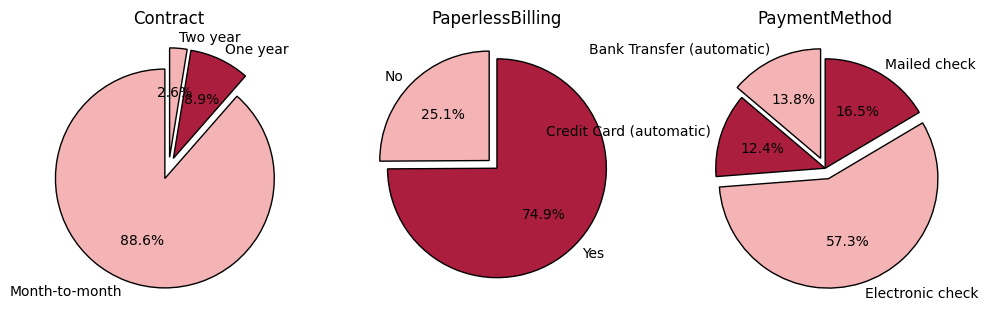

In [394]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers.
- PaperlessBilling does not seemed to be appreciated by the customers
- Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic).

3. Numerical Features Visualization

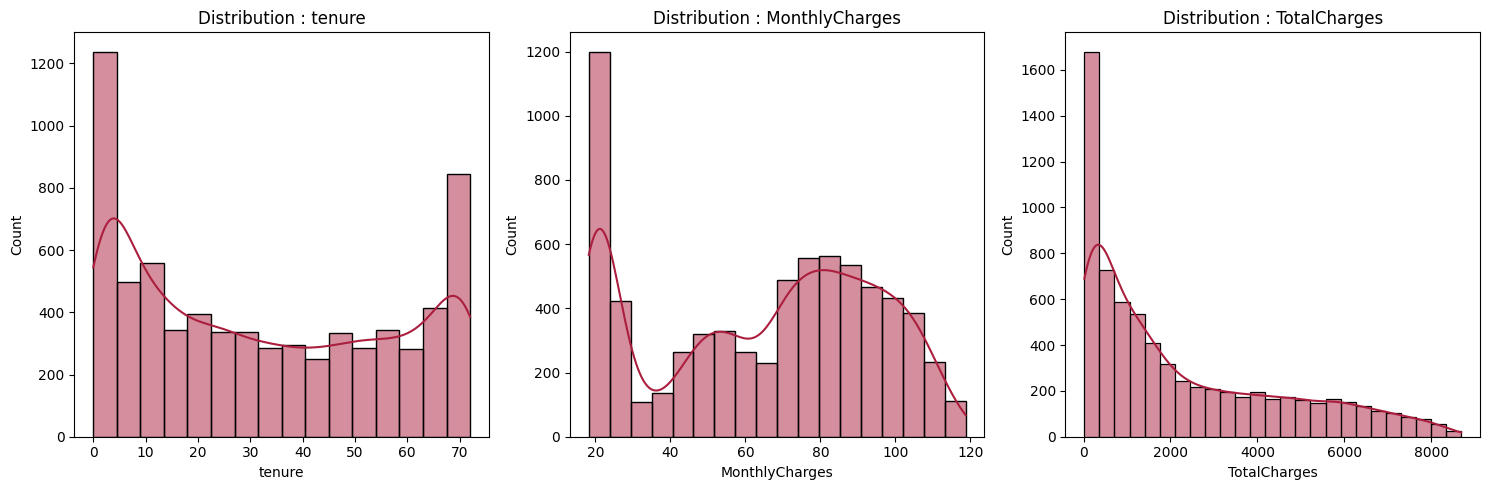

In [395]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(numerical_features),
    figsize=(5 * len(numerical_features), 5)
)

# If only one feature, make axes iterable
if len(numerical_features) == 1:
    axes = [axes]

for i, col in enumerate(numerical_features):
    sns.histplot(
        df1[col],
        kde=True,
        ax=axes[i],
        color=colors[1]
    )
    axes[i].set_title(f'Distribution : {col}')

plt.tight_layout()
plt.show()


- Tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
- The Total Charges is right-skewed, with peak ranges from 0 to 2000.

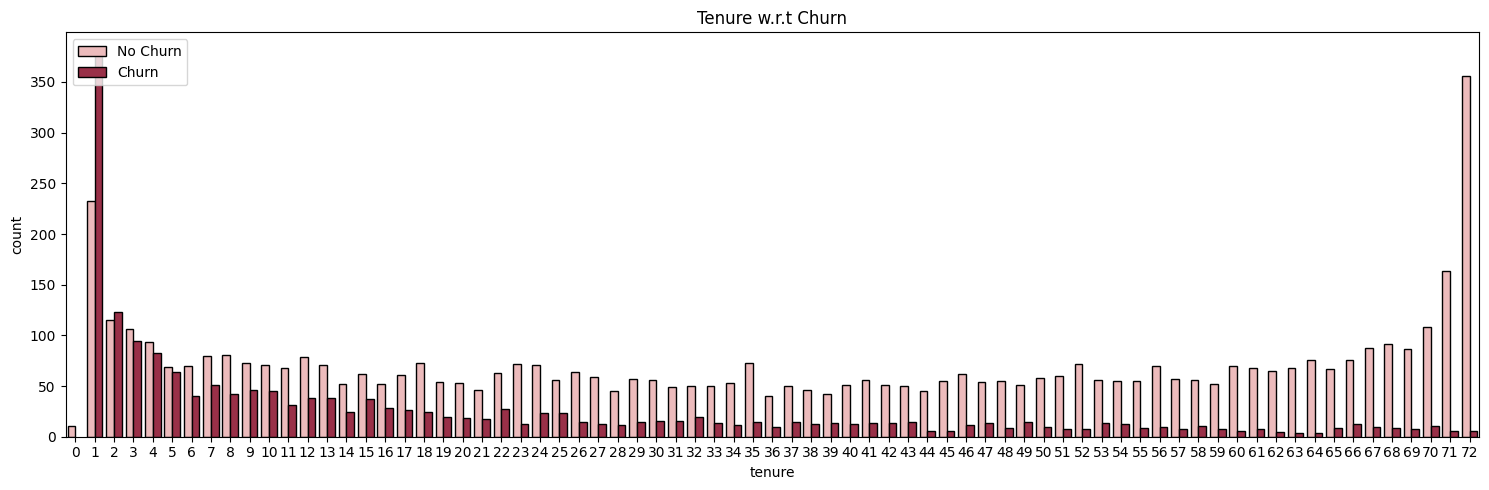

In [396]:
# Set up the figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting 'tenure' with respect to 'Churn'
sns.countplot(x='tenure', data=df1, hue="Churn", palette=colors, edgecolor='black')
plt.legend(['No Churn', 'Churn'], loc='upper left')
plt.title('Tenure w.r.t Churn')

plt.tight_layout()
plt.show()

Groups are created for Total Charges by grouping every 500 data and for Monthly Charges by grouping every 5 data.
- For tenure, the majority of customers tend to churn after only one month of subscription.
- However, for those who have been subscribed for a longer period, the retention rate improves, with a higher proportion of customers
continuing their subscriptions as the duration increases.

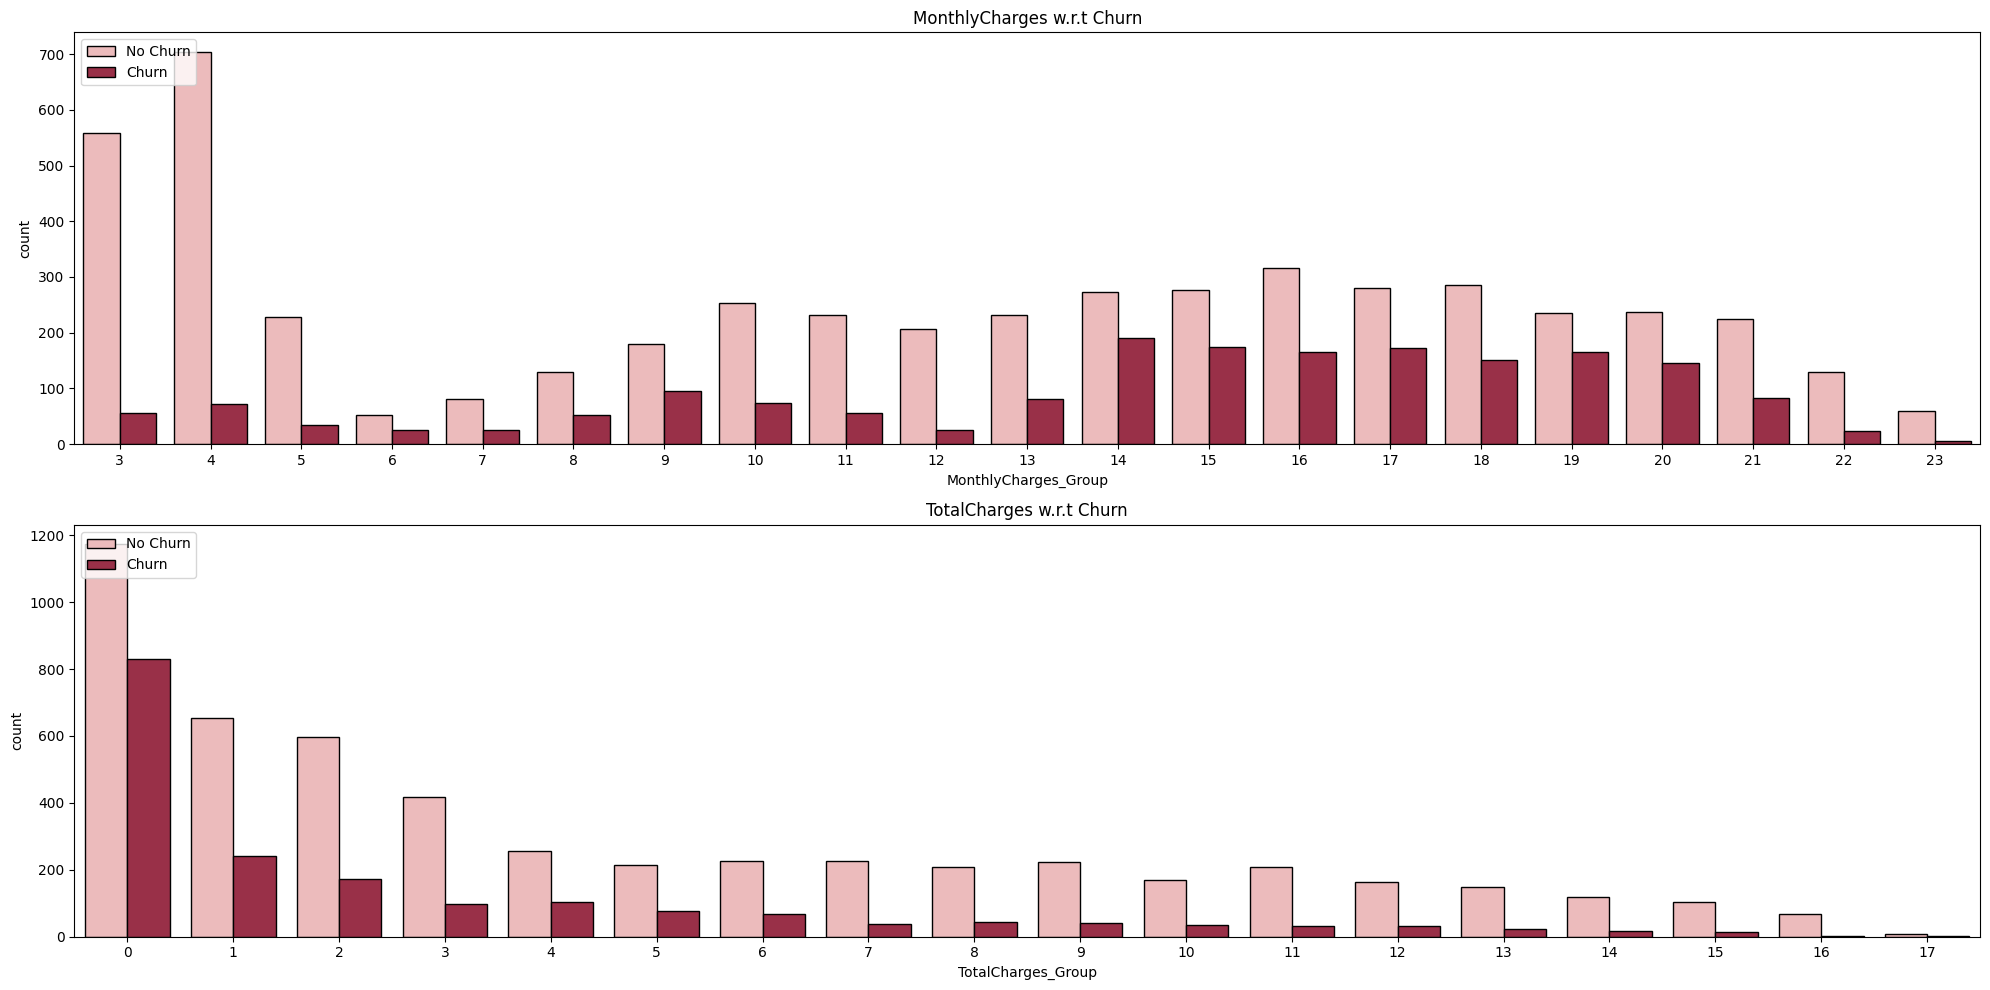

In [397]:
# Assuming 'numerical_features', 'df1', and 'colors' are defined
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

# Loop over only two numerical features
for i in range(2):
    sns.countplot(
        x=df1[numerical_features[1 + i] + '_Group'],
        data=df1,
        hue="Churn",
        palette=colors,
        edgecolor='black',
        ax=ax[i]
    )
    ax[i].legend(['No Churn', 'Churn'], loc='upper left')
    title = f'{numerical_features[1 + i]} w.r.t Churn'
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

- A significant number of customers tend to churn when their Monthly Charges fall within the range of 70 to 105.
- As Total Charges increase, the number of customers who churn also shows an increasing trend.
- The highest concentration of churned customers occurs at Total Charges below 500, indicating early-stage customer attrition.

# Feature Engineering

1. Feature Extraction
---
Feature extraction is the process of extracting relevant data or information from raw or complex datasets for use in analysis or data modeling. New features were extracted from existing features to enhance the dataset’s ability to provide
more meaningful information to the model.

In [398]:
df1['Tenure_in_years'] = df1['tenure'] / 12

df1['ChargesRatio'] = df1['TotalCharges'] / df1['MonthlyCharges']

df1['LevelTotalCharges'] = df1['TotalCharges'].apply(lambda x: '1' if 18.80 <= x <= 402 else
                                                       '2' if 403 <= x <= 1340 else
                                                       '0')

df1['LevelTenure'] = df1['tenure'].apply(lambda x: '2' if 0 <= x <= 9 else
                                           '1' if 10 <= x <= 30 else
                                           '0')

In [399]:
# Append new features to existing lists

numerical_features += ['Tenure_in_years', 'ChargesRatio']
categorical_features += ['LevelTotalCharges', 'LevelTenure']

Several new features were created:
- Tenure_in_years: This feature is extracted from the tenure feature, initially measured in months, and converted into years. This feature provides a simpler and more general understanding of the customer's subscription duration in years.
- ChargesRatio: This is the ratio between Total Charges and Monthly Charges. This ratio gives an idea of the customer's duration, indicating how long a customer has used the service based on the total
costs incurred per monthly charge.
- LevelTotalCharges: This is derived by grouping the Total Charges feature into several categories or levels. This feature helps segment customers based on the total amount they have spent, such as Low, Medium, or High spenders.
- LevelTenure: This feature categorizes the Tenure value (duration of subscription) into several levels. It helps in understanding the length of customer
subscriptions by dividing them into categories such as New, MidTerm, and LongTerm. With Level Tenure, customers can be more easily grouped based on their subscription length.

1. Data Standardization

In [400]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1['Tenure_in_years'] = mms.fit_transform(df1[['Tenure_in_years']])
df1['ChargesRatio'] = mms.fit_transform(df1[['ChargesRatio']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Group,TotalCharges_Group,Tenure_in_years,ChargesRatio,LevelTotalCharges,LevelTenure
0,0,0,1,0,0.01,0,1,0,0,2,...,2,0.12,0.00,0,5,0,0.01,0.00,1,2
1,1,0,0,0,0.47,1,0,0,2,0,...,3,0.39,0.22,0,11,3,0.47,0.11,0,0
2,1,0,0,0,0.03,1,0,0,2,2,...,3,0.35,0.01,1,10,0,0.03,0.00,1,2
3,1,0,0,0,0.62,0,1,0,2,0,...,0,0.24,0.21,0,8,3,0.62,0.14,0,0
4,0,0,0,0,0.03,1,0,1,0,0,...,2,0.52,0.02,1,14,0,0.03,0.00,1,2


2. Correlation Matrix - Heat Map

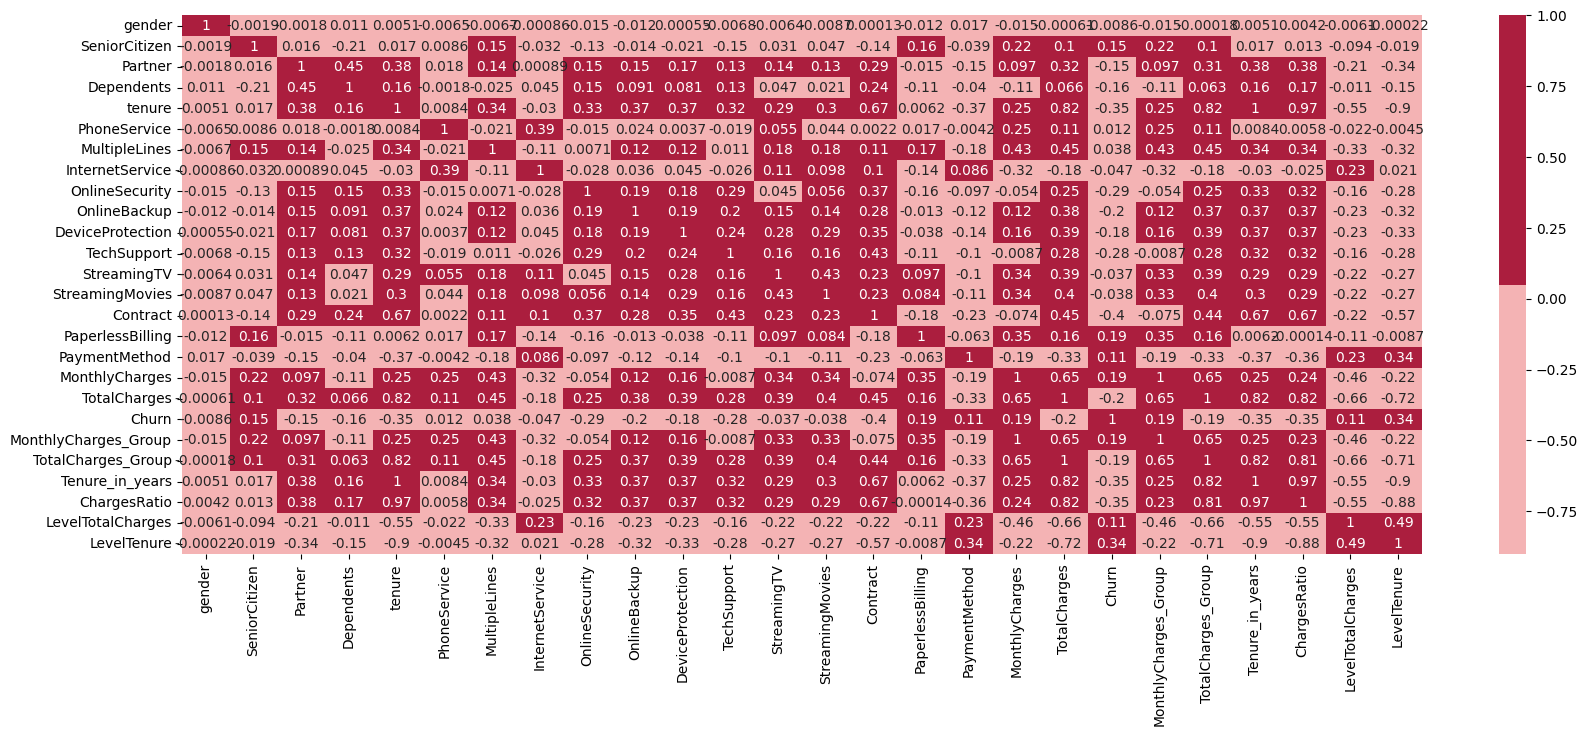

In [401]:
plt.figure(figsize = (20,7))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

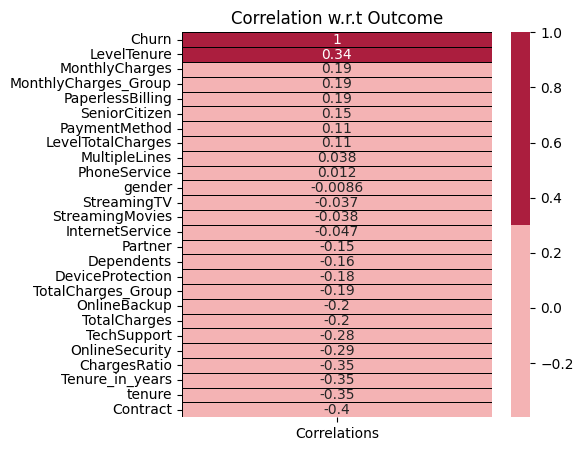

In [402]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

This correlation plot illustrates the relationships between the variables:
- The target feature (Churn) has a positive correlation with LevelTenure, MonthlyCharges, PaperlessBilling, SeniorCitizen, PaymentMethod, and
LevelTotalCharges
- The target feature (Churn) has a negative correlation with Contract, Tenure_in_years, Tenure, ChargesRatio, OnlineSecurity, TechSupport, TotalCharges, OnlineBackup, Partner, Dependents, and DeviceProtection.
- However, the correlation with MultipleLines, PhoneService, Gender, StreamingTV, StreamingMovies, and InternetService is weak.

Overall, customers with higher monthly costs and shorter service duration tend to have a higher likelihood of churn, while long-term contracts and value-added services are associated with increased customer retention.

3. Feature Selection From Categorical Features
---
Feature selection is the process of identifying and retaining the most relevant numerical features that contribute significantly to predicting the target variable. Focuses on reducing dimensionality by removing redundant, irrelevant, or highly correlated features while preserving the most informative variables.

the Chi-Square test is used to measure the degree of association between categorical features (independent) and the target (dependent), which is usually also categorical.

In [403]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

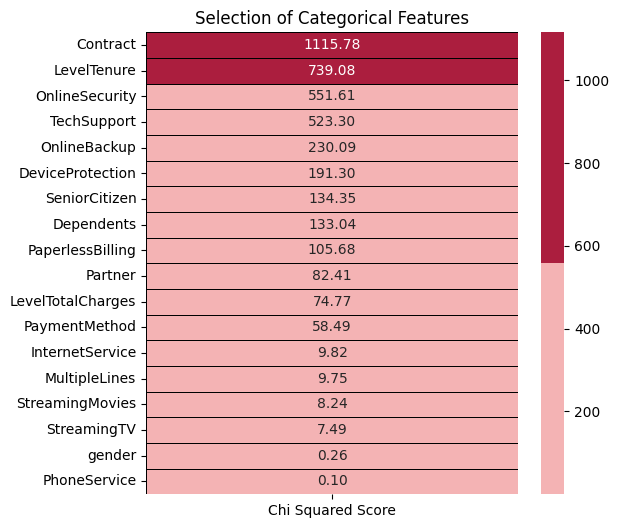

In [404]:
# Exclude target variable from categorical features
categorical_features_no_target = [
    col for col in categorical_features if col != 'Churn'
]

features = df1[categorical_features_no_target]
target = df1['Churn']

# Chi-Square feature selection
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(
    data=fit.scores_,
    index=features.columns,
    columns=['Chi Squared Score']
)

# Plot
plt.figure(figsize=(6, 6))
sns.heatmap(
    featureScores.sort_values(by='Chi Squared Score', ascending=False),
    annot=True,
    cmap=colors,
    linewidths=0.4,
    linecolor='black',
    fmt='.2f'
)

plt.title('Selection of Categorical Features')
plt.show()


- As a result, PhoneService, Gender, StreamingTV, StreamingMovies, MultipleLines, and InternetService show a very low relationship with Churn. These features will be removed in the next step.

In [405]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService', 'MonthlyCharges_Group', 'TotalCharges_Group'],inplace = True)

4. Feature Selection From Numerical Feature
---
The ANOVA (Analysis of Variance) test is a statistical method used to determine if there are significant differences between the means of different groups, making it valuable for **identifying** important features in data.

In [406]:
from sklearn.feature_selection import f_classif

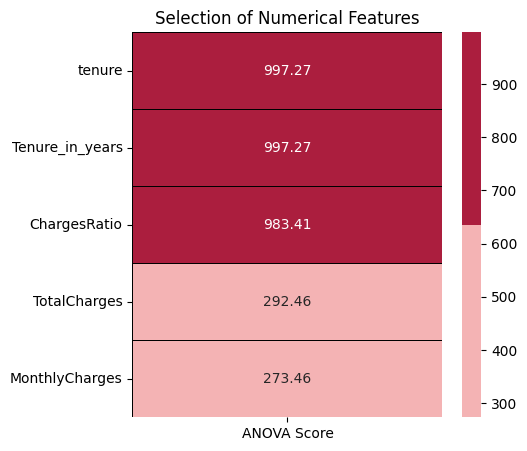

In [407]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- As a result that illustrated, all the numerical features were used for modeling because they have high ANOVA scores.

# A refined dataset
---
Save the dataset ready for Machine Learning Modeling

In [408]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_in_years,ChargesRatio,LevelTotalCharges,LevelTenure
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0,0.01,0.00,1,2
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0,0.47,0.11,0,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1,0.03,0.00,1,2
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0,0.62,0.14,0,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1,0.03,0.00,1,2


In [410]:
df1.to_csv("processed_data.csv", index=False)
df1.to_excel("processed_data.xlsx", index=False)